In [42]:
import numpy as np             
import pandas as pd          
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [2]:
data=pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = data.set_index(['Month'])
indexedDataset

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(indexedDataset,color="red")
    plt.ylabel("search frequence for heater",fontsize=16)
    
  

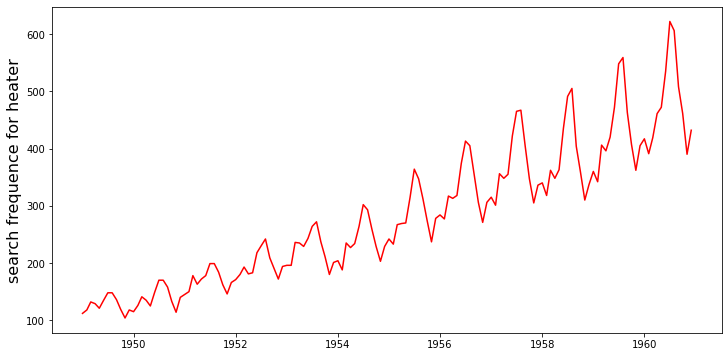

In [6]:
plot_series(indexedDataset)

In [7]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [8]:
perform_adf_test(indexedDataset)

ADF Statistic: 0.815369
p-value: 0.991880


In [9]:
datamean=indexedDataset.rolling(window=12).mean()
datastd=indexedDataset.rolling(window=12).std()

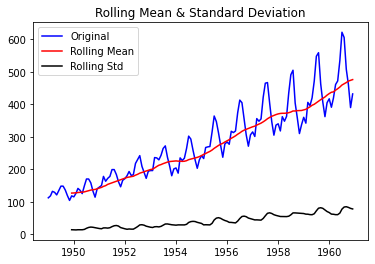

In [10]:
orig = plt.plot(indexedDataset, color='blue', label='Original')
mean = plt.plot(datamean, color='red', label='Rolling Mean')
std = plt.plot(datastd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

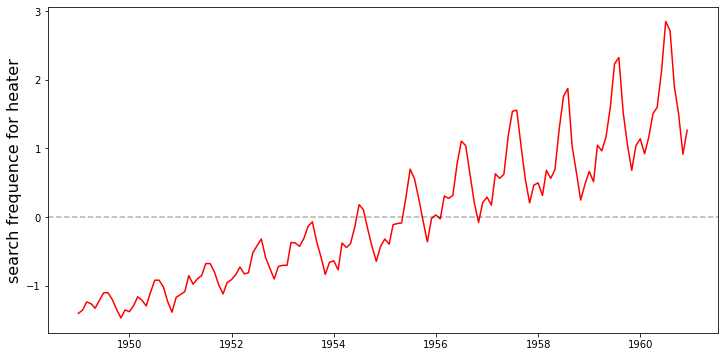

In [11]:
#normalize
avg,std=indexedDataset.mean(),indexedDataset.std()
indexedDataset=(indexedDataset-avg)/std
plot_series(indexedDataset)
plt.axhline(0,linestyle='--',color='k',alpha=0.3)

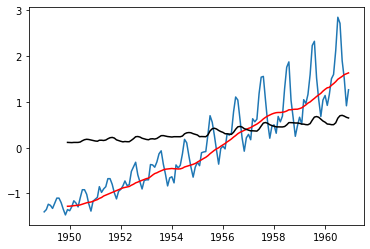

In [12]:
movingAverage = indexedDataset.rolling(window=12).mean()
movingSTD = indexedDataset.rolling(window=12).std()
plt.plot(indexedDataset)
plt.plot(movingAverage, color='red')
plt.plot(movingSTD, color='black')

In [18]:
datascaleavg=indexedDataset-movingAverage

datascaleavg.dropna(inplace=True)
datascaleavg.head(10)

,#Passengers
Month,
1949-12-01,-0.072243
1950-01-01,-0.099333
1950-02-01,-0.013198
1950-03-01,0.105585
1950-04-01,0.051403
1950-05-01,-0.034732
1950-06-01,0.155599
1950-07-01,0.315366
1950-08-01,0.300084


In [31]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
  
    

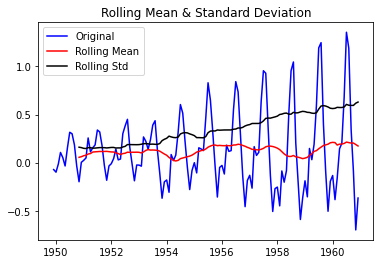

ADF Statistic: -3.164968
p-value: 0.022104


In [32]:
test_stationarity(datascaleavg)

In [57]:
mean = datascaleavg.ewm(halflife=12, min_periods=0, adjust=True).mean()

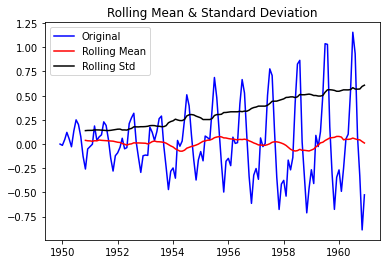

ADF Statistic: -3.416986
p-value: 0.010393


In [58]:
datascaleavg=datascaleavg-mean
test_stationarity(datascaleavg)

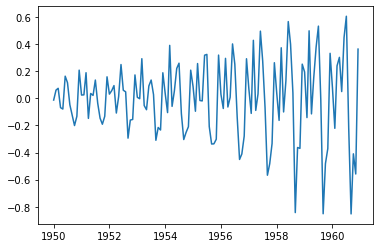

In [59]:
datascaleavg = datascaleavg - datascaleavg.shift()
plt.plot(datascaleavg)

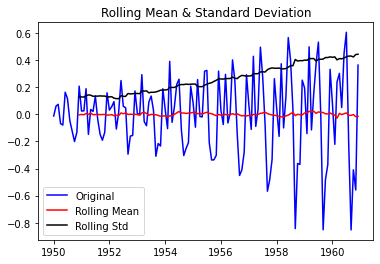

ADF Statistic: -3.246891
p-value: 0.017426


In [60]:
datascaleavg.dropna(inplace=True)
test_stationarity(datascaleavg)

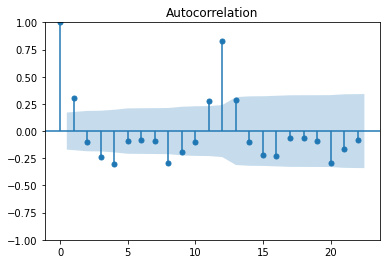

In [61]:
#ACF
acf_plot=plot_acf(datascaleavg)


C:\Users\UAS\PycharmProjects\feature_engineering\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


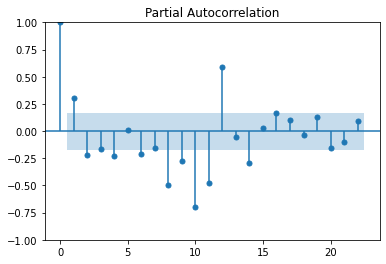

In [62]:
#PACF
pacf=plot_pacf(datascaleavg)

In [63]:
#building model
model=sm.tsa.arima.ARIMA(datascaleavg,order=(2,1,2))
result=model.fit()
print(result)

C:\Users\UAS\PycharmProjects\feature_engineering\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\UAS\PycharmProjects\feature_engineering\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\UAS\PycharmProjects\feature_engineering\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\UAS\PycharmProjects\feature_engineering\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


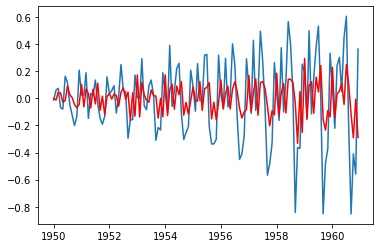

In [64]:
plt.plot(datascaleavg)
plt.plot(result.fittedvalues, color='red')